Bike Sharing in the Bay Area 
We end this chapter by using all the methods we have learned to examine a new and large dataset. We will also introduce map_table, a powerful visualization tool.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick 
import numpy as np
import pandas as pd


The Bay Area Bike Share service published a dataset describing every bicycle rental from September 2014 to August 2015 in their system. There were 354,152 rentals in all. The columns are:

An ID for the rental
Duration of the rental, in seconds
Start date
Name of the Start Station and code for Start Terminal
Name of the End Station and code for End Terminal
A serial number for the bike
Subscriber type and zip code

In [5]:
trips = pd.read_csv('trip.csv')
trips

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
354148,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


The histogram below shows that most of the trips took around 10 minutes (600 seconds) or so. Very few took near 30 minutes (1800 seconds), possibly because people try to return the bikes before the cutoff time so as not to have to pay.

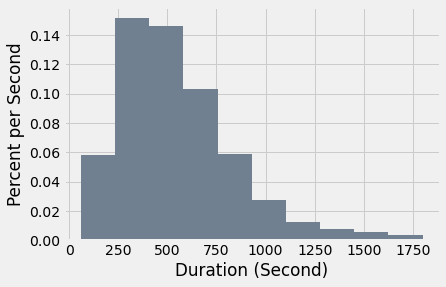

In [6]:
commute = trips[trips['Duration'] < 1800]
data = commute['Duration']
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, density=True, color='slategrey')
ax.set_xlabel('Duration (Second)')
ax.set_ylabel('Percent per Second')
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x*100):.2f}'))
plt.show()

We can get more detail by specifying a larger number of bins. But the overall shape doesn't change much.

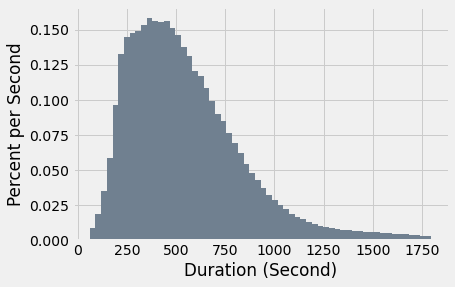

In [7]:
data = commute['Duration']
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=60, density=True, color='slategrey')
ax.set_xlabel('Duration (Second)')
ax.set_ylabel('Percent per Second')
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x*100):.3f}'))
plt.show()

## Exploring the Data with group and pivot 
We can use group to identify the most highly used Start Station:

In [8]:
starts = commute['Start Station'].value_counts().reset_index().rename(
 columns = {
 'index': 'Start Station',
 'Start Station': 'count'
 }).sort_values('count', ascending=False)
starts

,Start Station,count
0,San Francisco Caltrain (Townsend at 4th),25858
1,San Francisco Caltrain 2 (330 Townsend),21523
2,Harry Bridges Plaza (Ferry Building),15543
3,Temporary Transbay Terminal (Howard at Beale),14298
4,2nd at Townsend,13674
...,...,...
65,Mezes Park,189
66,Redwood City Medical Center,139
67,San Mateo County Center,108
68,Redwood City Public Library,101


The group method can also be used to classify the rentals by both Start Station and End Station.

In [9]:
commute.groupby(['Start Station', 'End Station'])[['Trip ID']].count().reset_index().rename(columns={
    'Trip ID': 'count'
})

,Start Station,End Station,count
0,2nd at Folsom,2nd at Folsom,54
1,2nd at Folsom,2nd at South Park,295
2,2nd at Folsom,2nd at Townsend,437
3,2nd at Folsom,5th at Howard,113
4,2nd at Folsom,Beale at Market,127
...,...,...,...
1624,Yerba Buena Center of the Arts (3rd @ Howard),Steuart at Market,202
1625,Yerba Buena Center of the Arts (3rd @ Howard),Temporary Transbay Terminal (Howard at Beale),113
1626,Yerba Buena Center of the Arts (3rd @ Howard),Townsend at 7th,261
1627,Yerba Buena Center of the Arts (3rd @ Howard),Washington at Kearny,66


There is a train station as well as a Bay Area Rapid Transit (BART) station near Beale at Market, explaining the high number of trips that start and end there.

In [10]:
commute.groupby(['Start Station', 'End Station'])[['Trip ID']].count().reset_index().rename(columns={
    'Trip ID': 'count'
}).pivot_table(index='End Station', columns='Start Station', values='count', fill_value=0)

Start Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
End Station,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,...,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,...,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,...,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,...,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,...,0,0,14,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Temporary Transbay Terminal (Howard at Beale),414,437,486,561,0,0,531,549,0,0,...,314,69,0,0,119,94,732,0,98,113
Townsend at 7th,347,309,418,313,0,0,55,43,0,0,...,344,464,0,0,734,825,132,0,53,261
University and Emerson,0,0,0,0,0,0,0,0,82,0,...,0,0,0,0,0,0,0,62,0,0


We can also use pivot to find the shortest time of the rides between Start and End Stations. Here pivot has been given Duration as the optional values argument, and min as the function which to perform on the values in each cell.

In [11]:
commute.pivot_table(index=['End Station'], columns=['Start Station'], values='Duration', aggfunc=np.min, fill_value=0)

Start Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
End Station,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,61,97,164,268,0,0,271,407,0,0,...,590,208,0,0,318,149,448,0,429,165
2nd at South Park,61,60,77,86,0,0,78,345,0,0,...,399,63,0,0,79,61,78,0,270,96
2nd at Townsend,137,67,60,423,0,0,311,469,0,0,...,777,241,0,0,291,249,259,0,610,284
5th at Howard,215,300,384,68,0,0,357,530,0,0,...,375,402,0,0,455,265,357,0,553,109
Adobe on Almaden,0,0,0,0,84,275,0,0,0,0,...,0,0,369,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Temporary Transbay Terminal (Howard at Beale),112,195,261,279,0,0,68,261,0,0,...,647,137,0,0,139,60,542,0,311,226
Townsend at 7th,399,324,319,330,0,0,614,822,0,0,...,351,514,0,0,624,534,61,0,817,432
University and Emerson,0,0,0,0,0,0,0,0,592,0,...,0,0,0,0,0,0,0,93,0,0


Drawing Maps 
The table stations contains geographical information about each bike station, including latitude, longitude, and a "landmark" which is the name of the city where the station is located.

In [12]:
stations = pd.read_csv('station.csv')
stations

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
...,...,...,...,...,...,...,...
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


We can draw a map of where the stations are located, using Marker.map_table. The function operates on a table, whose columns are (in order) latitude, longitude, and an optional identifier for each point.

In [13]:
data = stations[['lat', 'long', 'name']]
data

,lat,long,name
0,37.329732,-121.901782,San Jose Diridon Caltrain Station
1,37.330698,-121.888979,San Jose Civic Center
2,37.333988,-121.894902,Santa Clara at Almaden
3,37.331415,-121.893200,Adobe on Almaden
4,37.336721,-121.894074,San Pedro Square
...,...,...,...
65,37.789625,-122.400811,Market at Sansome
66,37.352601,-121.905733,Santa Clara County Civic Center
67,37.798541,-122.400862,Broadway St at Battery St
68,37.491269,-122.236234,Mezes Park
